In [41]:
import cv2
import numpy as np

ubah warna gambar jadi HSV

In [42]:
!wget https://df6asyv2kv4zi.cloudfront.net/detect-specific-colors-from-image-opencv/images/image_78261986331693928422048.jpg

--2024-12-26 02:51:27--  https://df6asyv2kv4zi.cloudfront.net/detect-specific-colors-from-image-opencv/images/image_78261986331693928422048.jpg
Resolving df6asyv2kv4zi.cloudfront.net (df6asyv2kv4zi.cloudfront.net)... 3.171.102.182, 3.171.102.131, 3.171.102.160, ...
Connecting to df6asyv2kv4zi.cloudfront.net (df6asyv2kv4zi.cloudfront.net)|3.171.102.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13803 (13K) [image/jpeg]
Saving to: ‘image_78261986331693928422048.jpg’

image_7826198633169 100%[===================>]  13.48K  --.-KB/s    in 0s      

2024-12-26 02:51:27 (254 MB/s) - ‘image_78261986331693928422048.jpg’ saved [13803/13803]



In [54]:
img = cv2.imread('/content/image_78261986331693928422048.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

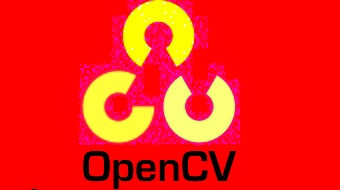

In [55]:
cv2_imshow(hsv_img)

range warna yang dideteksi

In [56]:
lower_range = (0, 50, 50) # lower range of red color in HSV
upper_range = (10, 255, 255) # upper range of red color in HSV
mask = cv2.inRange(hsv_img, lower_range, upper_range)

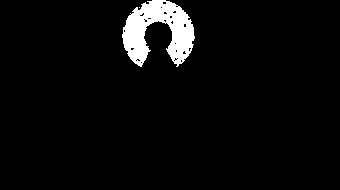

In [57]:
cv2_imshow(mask)

mask, hanya warna yang sesuai dalam range saja yang akan ditampilkan

In [58]:
color_image = cv2.bitwise_and(img, img, mask=mask)

tampilkan hanya warna merah saja

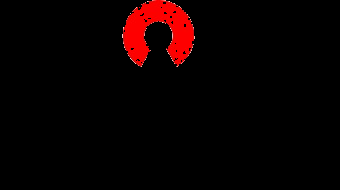

In [59]:
cv2_imshow(color_image)

In [52]:
!wget https://sf.ezoiccdn.com/ezoimgfmt/codeloop.org/wp-content/uploads/2019/06/circles.png

--2024-12-26 03:01:48--  https://sf.ezoiccdn.com/ezoimgfmt/codeloop.org/wp-content/uploads/2019/06/circles.png
Resolving sf.ezoiccdn.com (sf.ezoiccdn.com)... 18.160.41.115, 18.160.41.84, 18.160.41.13, ...
Connecting to sf.ezoiccdn.com (sf.ezoiccdn.com)|18.160.41.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘circles.png’

circles.png             [ <=>                ]  35.58K  --.-KB/s    in 0.002s  

2024-12-26 03:01:48 (17.8 MB/s) - ‘circles.png’ saved [36438]



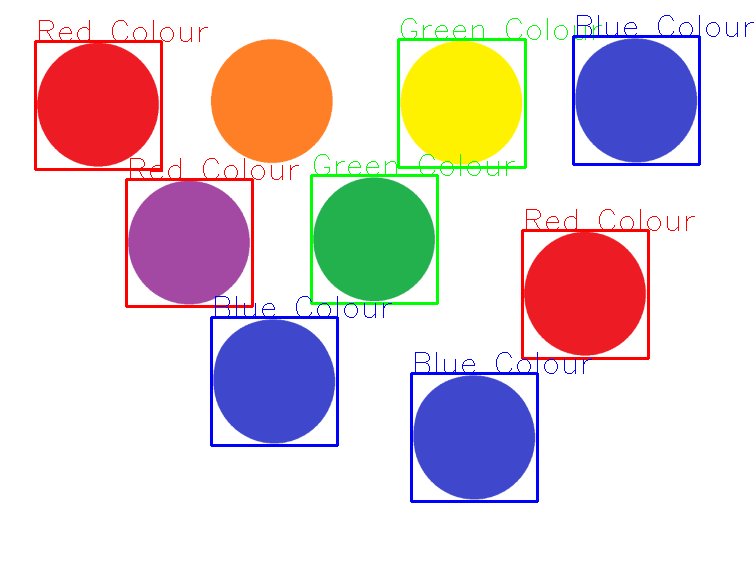

In [53]:
# Python code for Multiple Color Detection
import numpy as np
import cv2
imageFrame = cv2.imread('/content/circles.png')
# Convert to HSV
hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)

# Set range for red color and
# define mask
red_lower = np.array([136, 87, 111], np.uint8)
red_upper = np.array([180, 255, 255], np.uint8)
red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)

# Set range for green color and
# define mask
green_lower = np.array([25, 52, 72], np.uint8)
green_upper = np.array([102, 255, 255], np.uint8)
green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)

# Set range for blue color and
# define mask
blue_lower = np.array([94, 80, 2], np.uint8)
blue_upper = np.array([120, 255, 255], np.uint8)
blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)

# Morphological Transform, Dilation
# for each color and bitwise_and operator
# between imageFrame and mask determines
# to detect only that particular color
kernel = np.ones((5, 5), "uint8")

# For red color
red_mask = cv2.dilate(red_mask, kernel)
res_red = cv2.bitwise_and(imageFrame, imageFrame,
mask = red_mask)

# For green color
green_mask = cv2.dilate(green_mask, kernel)
res_green = cv2.bitwise_and(imageFrame, imageFrame,
mask = green_mask)

# For blue color
blue_mask = cv2.dilate(blue_mask, kernel)
res_blue = cv2.bitwise_and(imageFrame, imageFrame,
mask = blue_mask)

# Creating contour to track red color
contours, hierarchy = cv2.findContours(red_mask,
                        cv2.RETR_TREE,
                            cv2.CHAIN_APPROX_SIMPLE)

for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (0, 0, 255), 2)

        cv2.putText(imageFrame, "Red Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                        (0, 0, 255))

    # Creating contour to track green color
contours, hierarchy = cv2.findContours(green_mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (0, 255, 0), 2)

        cv2.putText(imageFrame, "Green Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1.0, (0, 255, 0))

    # Creating contour to track blue color
contours, hierarchy = cv2.findContours(blue_mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (255, 0, 0), 2)

        cv2.putText(imageFrame, "Blue Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1.0, (255, 0, 0))
from google.colab.patches import cv2_imshow
cv2_imshow(imageFrame)

# real time

In [ ]:
# Python code for Multiple Color Detection

import numpy as np
import cv2

# Capturing video through webcam
webcam = cv2.VideoCapture(0)

# Start a while loop
while(1):

    # Reading the video from the
    # webcam in image frames
    _, imageFrame = webcam.read()

    # Convert the imageFrame in
    # BGR(RGB color space) to
    # HSV(hue-saturation-value)
    # color space
    hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)

    # Set range for red color and
    # define mask
    red_lower = np.array([136, 87, 111], np.uint8)
    red_upper = np.array([180, 255, 255], np.uint8)
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)

    # Set range for green color and
    # define mask
    green_lower = np.array([25, 52, 72], np.uint8)
    green_upper = np.array([102, 255, 255], np.uint8)
    green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)

    # Set range for blue color and
    # define mask
    blue_lower = np.array([94, 80, 2], np.uint8)
    blue_upper = np.array([120, 255, 255], np.uint8)
    blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)

    # Morphological Transform, Dilation
    # for each color and bitwise_and operator
    # between imageFrame and mask determines
    # to detect only that particular color
    kernel = np.ones((5, 5), "uint8")

    # For red color
    red_mask = cv2.dilate(red_mask, kernel)
    res_red = cv2.bitwise_and(imageFrame, imageFrame,
                            mask = red_mask)

    # For green color
    green_mask = cv2.dilate(green_mask, kernel)
    res_green = cv2.bitwise_and(imageFrame, imageFrame,
                                mask = green_mask)

    # For blue color
    blue_mask = cv2.dilate(blue_mask, kernel)
    res_blue = cv2.bitwise_and(imageFrame, imageFrame,
                            mask = blue_mask)

    # Creating contour to track red color
    contours, hierarchy = cv2.findContours(red_mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > 300):
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (0, 0, 255), 2)

            cv2.putText(imageFrame, "Red Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                        (0, 0, 255))

    # Creating contour to track green color
    contours, hierarchy = cv2.findContours(green_mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > 300):
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (0, 255, 0), 2)

            cv2.putText(imageFrame, "Green Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1.0, (0, 255, 0))

    # Creating contour to track blue color
    contours, hierarchy = cv2.findContours(blue_mask,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > 300):
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y),
                                    (x + w, y + h),
                                    (255, 0, 0), 2)

            cv2.putText(imageFrame, "Blue Colour", (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1.0, (255, 0, 0))

    # Program Termination
    cv2.imshow("Multiple Color Detection in Real-TIme", imageFrame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        webcam.release()
        cv2.destroyAllWindows()
        break